# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

Сиды фиксируем для воспроизводимости данных. Чтобы проверяющие и/или другие разработчики могли получить аналогичные результаты при запуске кода на своих устройствах.

# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [4]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [5]:
df_test.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [6]:
df_test.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



По умолчанию, метод describe() обработает только числовые столбцы. Для того, чтобы обработать категориальные столбцы, нужно вызвать метод describe() с аргументом include='object'. Для того, чтобы обработать сразу и числовые, и категориальные столбцы, нужно параметру include присвоить значение 'all'.

In [16]:
df_train.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [17]:
df_test.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [20]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [3]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

Пропуски имеются.
В трейне в колонках: 'mileage' - 202 пропуска, 'engine' - 202 пропуска, 'max_power' - 196 пропусков, 'torque' - 203 пропуска,  'seats' - 202 пропуска.
В тесте в колонках: 'mileage' - 19 пропусков, 'engine' - 19 пропусков, 'max_power' - 19 пропусков, 'torque' - 19 пропусков,  'seats' - 19 пропусков.

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [3]:
# исключим целевую переменную
tmp = df_train.drop(['selling_price'], axis=1)

Как видно, если применить к трейн датасету маску, созданную методом duplicated(), получим датафрейм из 1159 эл-тов

In [8]:
tmp[tmp.duplicated()].shape

(1159, 12)

Но метод duplicated() по умолчанию имеет параметр keep='first', это означает, что первое входение объекта с одинаковым признаковым описанием не учитвается в числе 1159. Для того, чтобы ответить на вопрос, сколько различных объектов в трейн датасете имеют одинаковое признаковое описание нужно сделать следующее:

In [8]:
tmp[tmp.duplicated(keep=False)].shape[0] - tmp[tmp.duplicated()].shape[0]

640

Как видно, в трейн датасете имеется 640 различных объектов с одинаковым признаковым описанием, которые входят в датасет два и более раз.

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

Возможно, не совсем корректно понял вопрос. Кол-во уникальных повторяющихся объектов велико для вывода (640). Ниже представлены 10 случайных из них.

In [9]:
tmp[tmp.duplicated()].sample(10)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6542,Maruti Omni MPI STD BSIII 8-STR W/ IMMOBILISER,2008,48676,Petrol,Individual,Manual,First Owner,19.7 kmpl,796 CC,35 bhp,"6.1@ 3,000(kgm@ rpm)",8.0
2659,Maruti Swift AMT ZXI,2018,69779,Petrol,Dealer,Automatic,First Owner,22.0 kmpl,1197 CC,81.80 bhp,113Nm@ 4200rpm,5.0
984,Toyota Etios VX,2017,25538,Petrol,Trustmark Dealer,Manual,First Owner,16.78 kmpl,1496 CC,88.73 bhp,132Nm@ 3000rpm,5.0
2902,Maruti Swift Dzire VXI,2014,30000,Petrol,Individual,Manual,First Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
5064,Maruti Swift Dzire VDI,2014,60000,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1604,Toyota Innova 2.5 VX (Diesel) 7 Seater,2013,79328,Diesel,Trustmark Dealer,Manual,Second Owner,12.99 kmpl,2494 CC,100.6 bhp,200Nm@ 1200-3600rpm,7.0
4815,Hyundai Grand i10 1.2 CRDi Sportz,2017,56290,Diesel,Dealer,Manual,First Owner,24.0 kmpl,1186 CC,73.97 bhp,190.24nm@ 1750-2250rpm,5.0
3786,Volvo V40 D3 R-Design,2018,2000,Diesel,Dealer,Automatic,First Owner,16.8 kmpl,1984 CC,150 bhp,350Nm@ 1500-2750rpm,5.0
5990,Tata Safari Storme EX,2015,110000,Diesel,Individual,Manual,First Owner,14.1 kmpl,2179 CC,147.94 bhp,320Nm@ 1500-3000rpm,7.0
4090,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [4]:
# получим индексы строк, которые необходимо удалить
ind = list(tmp[tmp.duplicated()].index)

In [5]:
df_train.drop(index=ind, inplace=True)

In [6]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [7]:
df_train.reset_index(drop=True , inplace=True)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

In [8]:
# в абсолютном большинтся столбццы содержат строки вида "число ед.изм.", но имеются пара объектов, в которых содержатся 
# числа типа float поэтому x сначала переводится к str, чтобы можно было применить split ко всем элементам
df_train['mileage'] = df_train['mileage'].apply(lambda x: float(str(x).split()[0]))
df_test['mileage'] = df_test['mileage'].apply(lambda x: float(str(x).split()[0]))

In [9]:
df_train['engine'] = df_train['engine'].apply(lambda x: float(str(x).split()[0]))
df_test['engine'] = df_test['engine'].apply(lambda x: float(str(x).split()[0]))

In [10]:
# в трейне есть объект, у которого в столбце 'max_power' записано просто 'bph', заменим его на np.nan
df_train[df_train['max_power'] == ' bhp']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
3586,Maruti Omni CNG,2000,80000,100000,CNG,Individual,Manual,Second Owner,10.9,796.0,bhp,NaN,8.0


In [11]:
df_train['max_power'] = np.where(df_train['max_power'] == ' bhp', np.nan, df_train['max_power'])

In [12]:
# проверка
df_train.iloc[3586]

name             Maruti Omni CNG
year                        2000
selling_price              80000
km_driven                 100000
fuel                         CNG
seller_type           Individual
transmission              Manual
owner               Second Owner
mileage                     10.9
engine                     796.0
max_power                    NaN
torque                       NaN
seats                        8.0
Name: 3586, dtype: object

In [13]:
df_train['max_power'] = df_train['max_power'].apply(lambda x: float(str(x).split()[0]))
df_test['max_power'] = df_test['max_power'].apply(lambda x: float(str(x).split()[0]))

In [14]:
# удалим стобец 'torque'
df_train.drop(['torque'], axis=1, inplace=True)
df_test.drop(['torque'], axis=1, inplace=True)

In [128]:
df_train.sample(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
4146,Maruti Eeco 5 Seater AC BSIV,2014,300000,49025,Petrol,Individual,Manual,First Owner,15.37,1196.0,73.0,5.0
3893,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.40,1896.0,90.0,5.0
4394,Tata Tigor 1.2 Revotron XZ,2018,535000,30000,Petrol,Individual,Manual,First Owner,20.30,1199.0,84.0,5.0
1434,Honda City i VTEC V,2016,675000,53201,Petrol,Trustmark Dealer,Manual,Second Owner,17.80,1497.0,117.3,5.0
4600,Tata Bolt Revotron XE,2017,350000,35000,Petrol,Individual,Manual,First Owner,17.57,1193.0,88.7,5.0


In [129]:
df_test.sample(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
112,Maruti Swift Dzire ZDI,2017,750000,110000,Diesel,Individual,Manual,Second Owner,28.4,1248.0,74.02,5.0
646,Ford Fiesta 1.4 SXi TDCi ABS,2010,229999,170000,Diesel,Individual,Manual,Second Owner,17.8,1399.0,68.00,5.0
825,Honda Amaze S i-VTEC,2019,690000,1303,Petrol,Dealer,Manual,First Owner,17.8,1198.0,86.70,5.0
354,Mahindra Bolero SLX,2011,340000,100000,Diesel,Individual,Manual,Second Owner,13.6,2523.0,63.00,7.0
565,Maruti Wagon R AX Minor,2007,80000,63000,Petrol,Individual,Automatic,Third Owner,18.9,1061.0,67.00,5.0


**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [ ]:
# Не выполнял (столбец torque удален)

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [15]:
# наши пропуски
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          186
engine           186
max_power        184
seats            186
dtype: int64

In [16]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
seats            19
dtype: int64

In [17]:
# mileage - непрерывная величина
mean_mileage = round(df_train['mileage'].mean(), 2)
mean_mileage

19.43

In [18]:
# engine - дискретная величина (приниает только целые значения), считаем median(), а не mean()
median_engine = df_train['engine'].median()
median_engine

1248.0

In [19]:
# max_power - непрерывная величина
mean_power = round(df_train['max_power'].mean(), 2)
mean_power

88.1

In [20]:
# engine - дискретная величина (приниает только целые значения), считаем median(), а не mean()
median_seats = df_train['seats'].median()
median_seats

5.0

In [21]:
df_train['mileage'].fillna(mean_mileage, inplace=True)
df_test['mileage'].fillna(mean_mileage, inplace=True)

df_train['engine'].fillna(median_engine, inplace=True)
df_test['engine'].fillna(median_engine, inplace=True)

df_train['max_power'].fillna(mean_power, inplace=True)
df_test['max_power'].fillna(mean_power, inplace=True)

df_train['seats'].fillna(median_seats, inplace=True)
df_test['seats'].fillna(median_seats, inplace=True)

In [22]:
# проверка
df_train.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [23]:
df_test.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

Если применить метод unique() к столбцу 'seats', то можно увидеть что возможны всего 9 различных значений в диапазоне от 2 до 14. Если относиться к данному признаку как к числовому, то при передачи их в модели признаки одних объектов будут входить с коэффициенто на порядок больше, чем у других, т.е. возникает некоторое "необоснованное" выделение некоторых объектов по данному признаку. Что в конечном итоге может отразиться на точности предсказаний модели. 

In [24]:
df_train['engine'] = df_train['engine'].apply(int)
df_test['engine'] = df_test['engine'].apply(int)

df_train['seats'] = df_train['seats'].apply(int)
df_test['seats'] = df_test['seats'].apply(int)

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

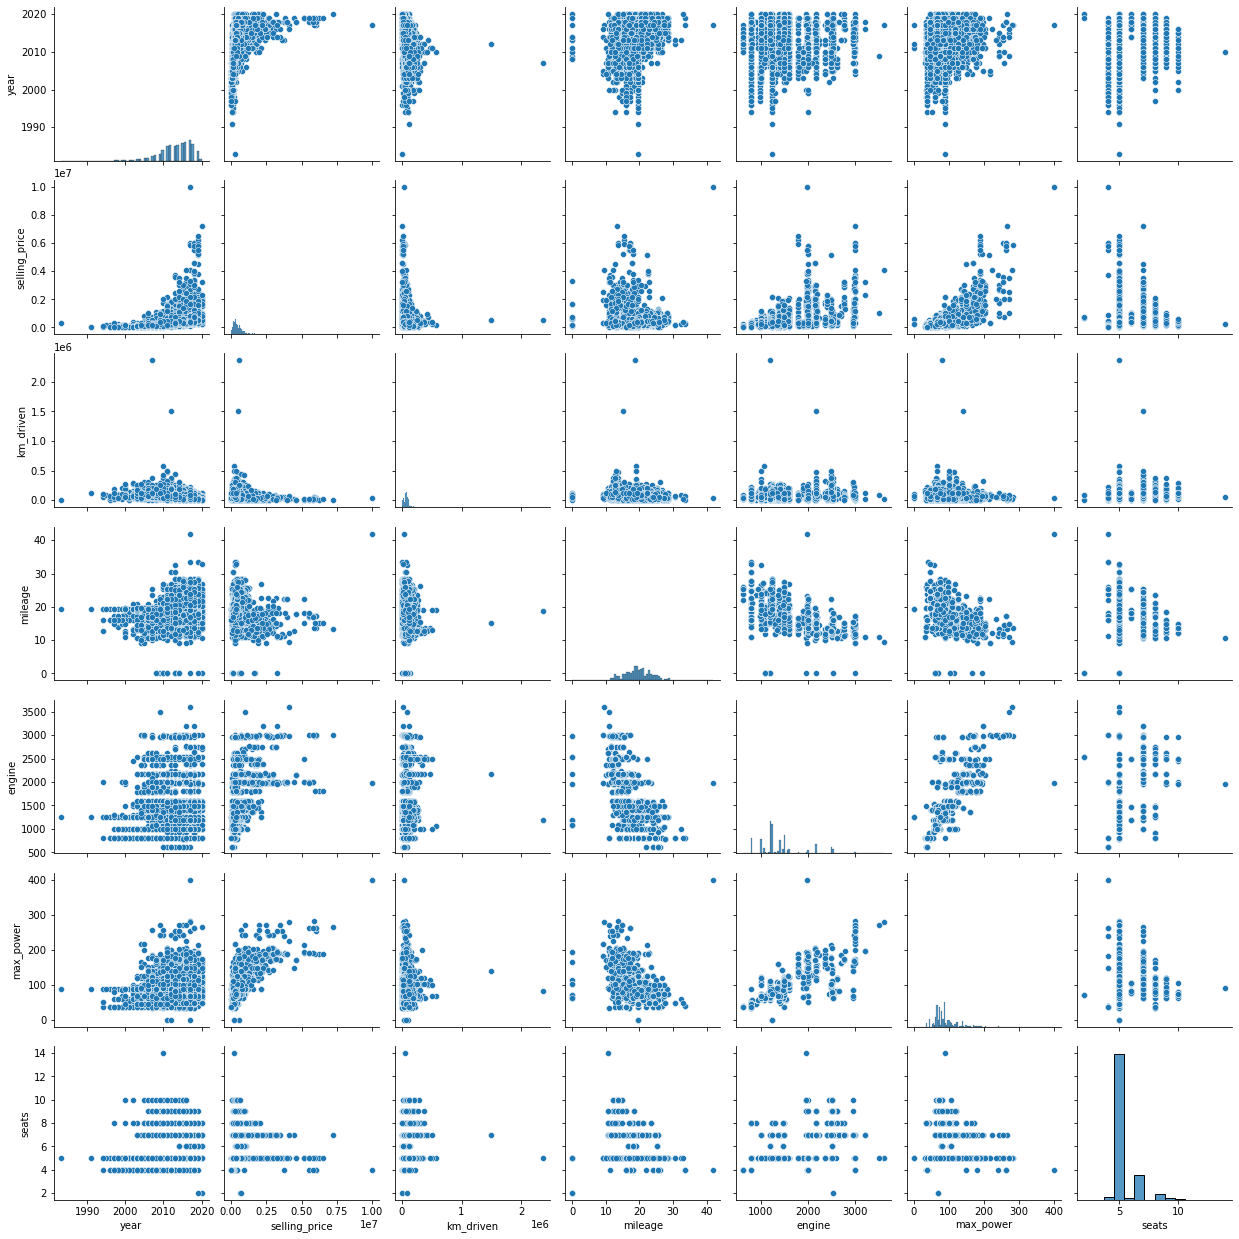

In [141]:
sns.pairplot(df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

По форме, которую принимает группа точек рассматриваемого признака, можно сделать косвенные/приблеженные суждения о зависимости данных признаков от цены. К примеру, если посмотреть на график зависимости 'selling_price' от 'year', то можно предположить наличие нелинейное зависимости между признаками. Или, к примеру, признак 'max_power', который немного "вытянут" вдоль диагональной линии, что позволяет судить о прямой зависимости значения целевой переменной от значения данного признака (но это в среднем, т.к. каждый случай уникален и в итоге значение целевой переменной складывается из многих факторов).

Также на графиках видно малое число точек, которые находятся "далеко" от основной группы, что может означать наличие выбросов в датасете.

In [144]:
df_train.corr()

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.427279,-0.368966,0.340613,0.002819,0.147373,0.041178
selling_price,0.427279,1.000000,-0.164828,-0.105036,0.447672,0.689745,0.149953
km_driven,-0.368966,-0.164828,1.000000,-0.181948,0.229766,0.026444,0.192328
mileage,0.340613,-0.105036,-0.181948,1.000000,-0.573075,-0.373802,-0.451269
engine,0.002819,0.447672,0.229766,-0.573075,1.000000,0.679167,0.652172
max_power,0.147373,0.689745,0.026444,-0.373802,0.679167,1.000000,0.241659
seats,0.041178,0.149953,0.192328,-0.451269,0.652172,0.241659,1.000000


Сильно скоррелированных признаков (для которых корреляция близка к 1), не наблюдается, но опредленная зависимость между признаками имеется. К примеру, примечательна зависимость 'max_power' от величины 'engine'.

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

Метод pairplot() информативен, так ка масштаб графиков мал, также в трейн датасета присутствуют выбросы, что приводит к различному масштабу графиков на трейне и тесте. Поэтому принято решения отрисовать отдельно графики каждого числового признака для трейна и теста.  

(1994.0, 2021.0)

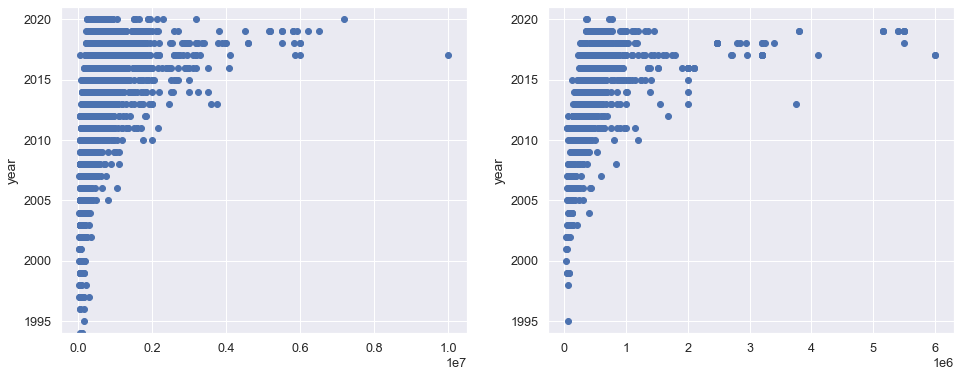

In [183]:
feature = 'year'
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(df_train['selling_price'], df_train[feature])
ax2.scatter(df_test['selling_price'], df_test[feature])

ax1.set_ylabel(feature)
ax2.set_ylabel(feature)

ax1.set_ylim(1994, 2021)
ax2.set_ylim(1994, 2021)

(0.0, 400000.0)

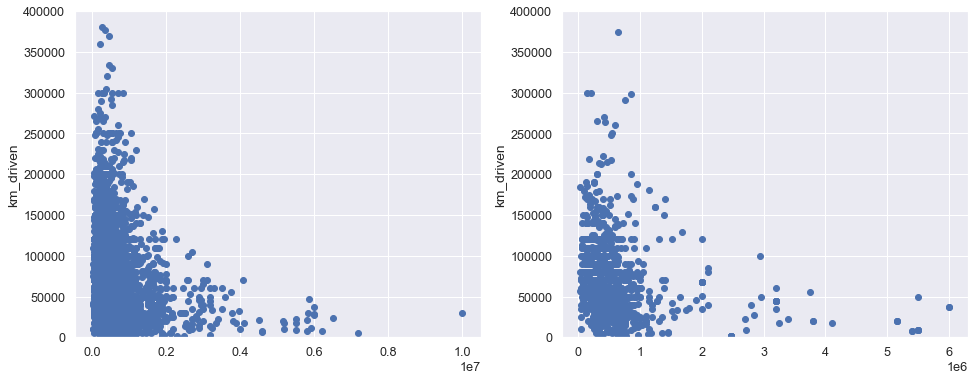

In [187]:
feature = 'km_driven'
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(df_train['selling_price'], df_train[feature])
ax2.scatter(df_test['selling_price'], df_test[feature])

ax1.set_ylabel(feature)
ax2.set_ylabel(feature)

ax1.set_ylim(0, 400000)
ax2.set_ylim(0, 400000)

(0.0, 30.0)

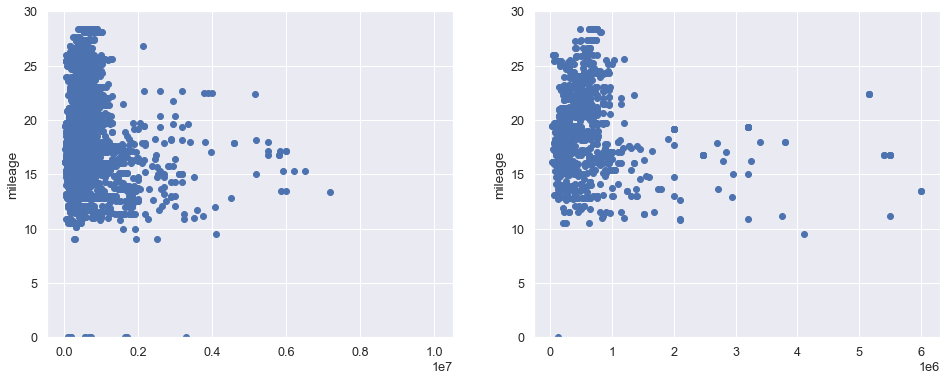

In [190]:
feature = 'mileage'
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(df_train['selling_price'], df_train[feature])
ax2.scatter(df_test['selling_price'], df_test[feature])

ax1.set_ylabel(feature)
ax2.set_ylabel(feature)

ax1.set_ylim(0, 30)
ax2.set_ylim(0, 30)

Text(0, 0.5, 'engine')

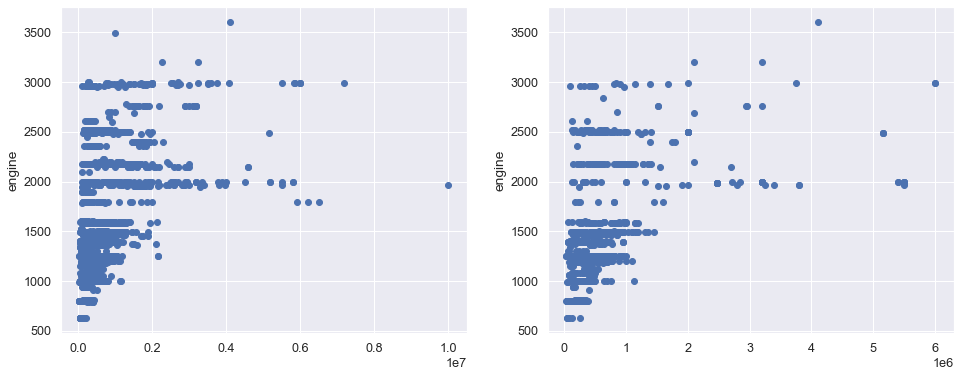

In [191]:
feature = 'engine'
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(df_train['selling_price'], df_train[feature])
ax2.scatter(df_test['selling_price'], df_test[feature])

ax1.set_ylabel(feature)
ax2.set_ylabel(feature)

(0.0, 300.0)

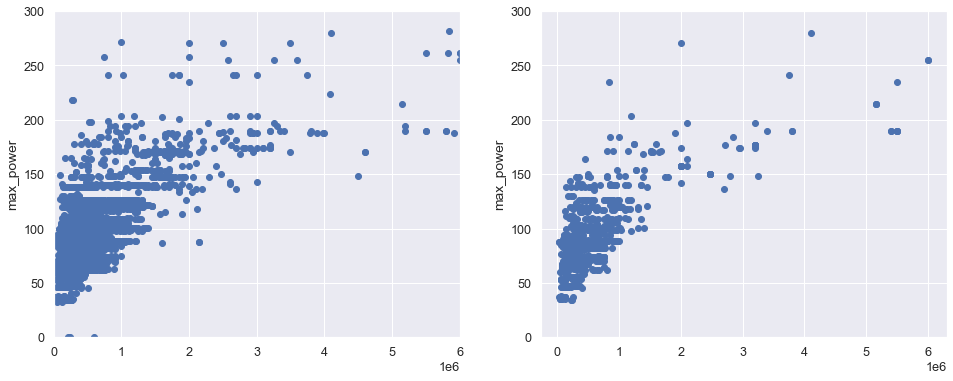

In [194]:
feature = 'max_power'
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(df_train['selling_price'], df_train[feature])
ax2.scatter(df_test['selling_price'], df_test[feature])

ax1.set_ylabel(feature)
ax2.set_ylabel(feature)

ax1.set_ylim(0, 300)
ax1.set_xlim(0, 6000000)
ax2.set_ylim(0, 300)

(0.0, 15.0)

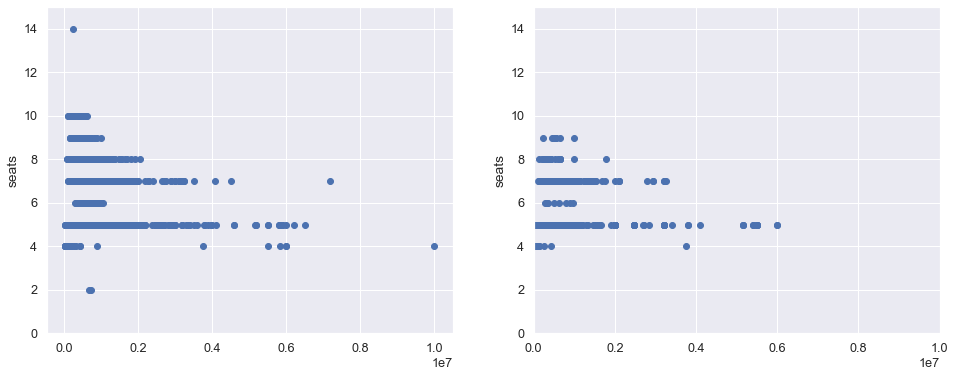

In [197]:
feature = 'seats'
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(df_train['selling_price'], df_train[feature])
ax2.scatter(df_test['selling_price'], df_test[feature])

ax1.set_ylabel(feature)
ax2.set_ylabel(feature)


ax1.set_ylim(0, 15)
ax2.set_xlim(0, 10000000)
ax2.set_ylim(0, 15)

После визуального сравнения графиков различных признаков объектов от целевой переменной для трейн и тест датасетов, можно сказать, что полученные совокупности объектов после разделения похожи. Также, ниже, рядом с тепловой картой попарных корреляций для трейн датасета, приведена аналогичная тепловая карта для тест датасета. Их сравнений между собой также говорит о похожасти данных совокупностей.

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

Text(0.5, 1.0, 'Test dataset')

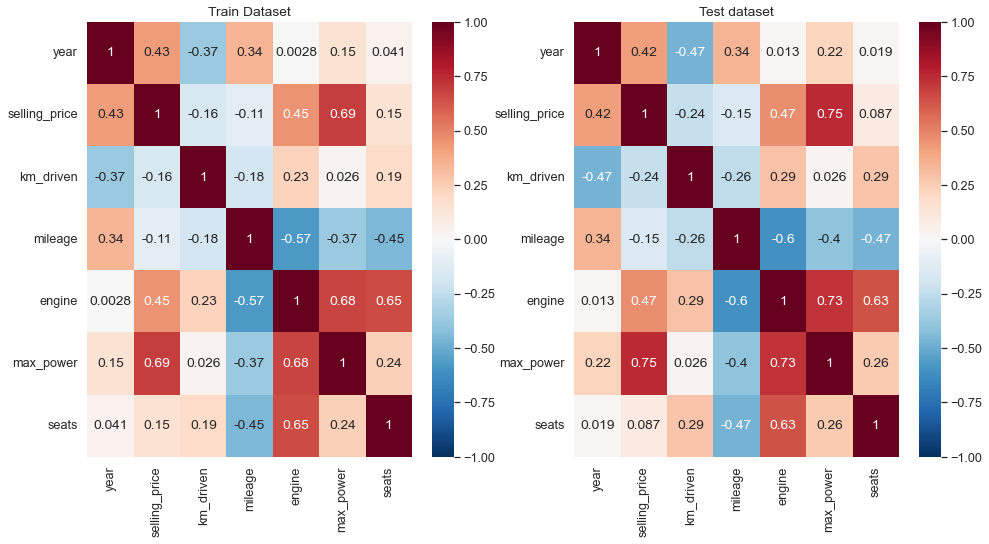

In [198]:
# рядом, для сравнения, приведена тепловая карта для трейн датасета
fig = plt.figure(figsize=(16,8))

ax1 = fig.add_subplot(121)
sns.heatmap(
    df_train.drop(['name', 'fuel', 'seller_type', 'transmission', 'owner'], axis=1).corr(),        
    cmap='RdBu_r', 
    annot=True,
    vmin=-1, vmax=1);
ax1.set_title('Train Dataset')

ax2 = fig.add_subplot(122)
sns.heatmap(
    df_test.drop(['name', 'fuel', 'seller_type', 'transmission', 'owner'], axis=1).corr(),        
    cmap='RdBu_r', 
    annot=True,
    vmin=-1, vmax=1);
ax2.set_title('Test dataset')

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

- Наименьшую корреляюци в трейн датасете имеют признаки - engine и year;
- сильная положительная зависимость выражается в близком к единице положительном значении корреляции для двух признаков; из анализа тепловой карты можно выделить три пары признаков, с практически одинаковыми значениями коэф. корреляции - (max_power, selling_price), (max_power, engine) и (max_power, seats);
- Скорее всего да, правильно. Корреляция отрицательна, что говорит об обратной зависимости, а также не очень мала по абсолютному значению.

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

<AxesSubplot:xlabel='selling_price', ylabel='max_power'>

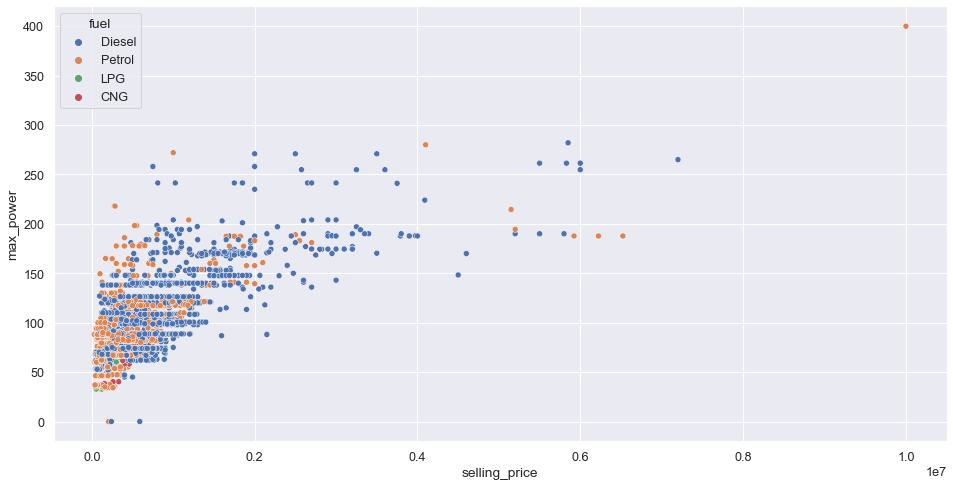

In [203]:
# наиболее скор. признаки - max-power и selling_price
fig = plt.figure(figsize=(16,8))
sns.scatterplot(data=df_train,
               x='selling_price',
               y='max_power',
               hue='fuel')

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [ ]:
# your code here

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [25]:
y_train = df_train['selling_price']
X_train = df_train.drop(['name', 'selling_price', 'fuel', 'seller_type', 'transmission', 'owner'], axis=1)

In [26]:
assert X_train.shape == (5840, 6)

In [27]:
y_test = df_test['selling_price']
X_test = df_test.drop(['name', 'selling_price', 'fuel', 'seller_type', 'transmission', 'owner'], axis=1)

In [28]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [31]:
print('MSE train: {}'.format(MSE(y_train, pred_train)))
print('MSE test: {}'.format(MSE(y_test, pred_test)))
print('R2 train: {}'.format(r2_score(y_train, pred_train)))
print('R2 test: {}'.format(r2_score(y_test, pred_test)))

MSE train: 116887249752.67693
MSE test: 233426792728.43427
R2 train: 0.592213482598634
R2 test: 0.5939192817775479


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [32]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_sc = pd.DataFrame(sc.transform(X_train))
X_test_sc = pd.DataFrame(sc.transform(X_test))

In [33]:
model1 = LinearRegression()
model1.fit(X_train_sc, y_train)

pred_train = model1.predict(X_train_sc)
pred_test = model1.predict(X_test_sc)

In [34]:
print('MSE train: {}'.format(MSE(y_train, pred_train)))
print('MSE test: {}'.format(MSE(y_test, pred_test)))
print('R2 train: {}'.format(r2_score(y_train, pred_train)))
print('R2 test: {}'.format(r2_score(y_test, pred_test)))

MSE train: 116887249752.67683
MSE test: 233426792728.4279
R2 train: 0.5922134825986344
R2 test: 0.5939192817775589


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [35]:
model1.coef_

array([156782.07415501, -43705.02701583,  27520.3425299 ,  62640.1828329 ,
       320807.85210873, -23726.53088336])

Признак с порядковым номером 4 оказался наиболее информативным, как имеющий наибольнее по модулю значение веса. Это признак 'engine'.

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [36]:
from sklearn.linear_model import Lasso

model3 = Lasso()
model3.fit(X_train_sc, y_train)

pred_train = model3.predict(X_train_sc)
pred_test = model3.predict(X_test_sc)

In [37]:
print('MSE train: {}'.format(MSE(y_train, pred_train)))
print('MSE test: {}'.format(MSE(y_test, pred_test)))
print('R2 train: {}'.format(r2_score(y_train, pred_train)))
print('R2 test: {}'.format(r2_score(y_test, pred_test)))

MSE train: 116887249762.83484
MSE test: 233427465844.43552
R2 train: 0.592213482563196
R2 test: 0.5939181107918781


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [38]:
model3.coef_

array([156781.90819771, -43703.89475971,  27518.44760775,  62635.34816962,
       320808.72293948, -23723.65434449])

Не занулила. Причина может быть в том, что выбранный по умолчанию параметр alpha для Lasso слишком мал. Но в теории, L1 регуляризация не обязана всегда занулять веса, все зависит от данных.

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
model4 = Lasso()
parameters = {'alpha':list(range(20000, 30001, 10))}
grid = GridSearchCV(model4, parameters, cv=10)

In [41]:
grid.fit(X_train_sc, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [20000, 20010, 20020, 20030, 20040, 20050,
                                   20060, 20070, 20080, 20090, 20100, 20110,
                                   20120, 20130, 20140, 20150, 20160, 20170,
                                   20180, 20190, 20200, 20210, 20220, 20230,
                                   20240, 20250, 20260, 20270, 20280, 20290, ...]})

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

Кол-во моделей, которое обучает GridSearchCV равно числу значений, которое принимает alpha (задается пользователем) * СV(равное 10 в задании).

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [42]:
# перебор значений alpha в диапазоне от 1 до 50000 c шагом 10 дал следующий результат
grid.best_params_

{'alpha': 26640}

In [43]:
model5 = Lasso(alpha=26640)
model5.fit(X_train_sc, y_train)

pred_train = model5.predict(X_train_sc)
pred_test = model5.predict(X_test_sc)
print('MSE train: {}'.format(MSE(y_train, pred_train)))
print('MSE test: {}'.format(MSE(y_test, pred_test)))
print('R2 train: {}'.format(r2_score(y_train, pred_train)))
print('R2 test: {}'.format(r2_score(y_test, pred_test)))

MSE train: 119684535080.24675
MSE test: 250489343204.32666
R2 train: 0.5824545461507217
R2 test: 0.5642364305890896


In [44]:
model5.coef_

array([149262.38551692, -15023.66945281,      0.        ,      0.        ,
       321039.8723696 ,     -0.        ])

Занулилось 3 веса. Но и значения метрик немного упали

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [45]:
from sklearn.linear_model import ElasticNet

In [77]:
model6 = ElasticNet()
parameters = {'alpha': list(range(1, 30001, 10))}
grid = GridSearchCV(model6, parameters, cv=10)
grid.fit(X_train_sc, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101,
                                   111, 121, 131, 141, 151, 161, 171, 181, 191,
                                   201, 211, 221, 231, 241, 251, 261, 271, 281,
                                   291, ...]})

In [78]:
grid.best_params_

{'alpha': 1}

Попробуем искать значения альфа в интервале от 0 до 1

In [52]:
model7 = ElasticNet()
parameters = {'alpha': [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9],
              'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
grid = GridSearchCV(model7, parameters, cv=10)
grid.fit(X_train_sc, y_train)
grid.best_params_

{'alpha': 0.7, 'l1_ratio': 0.8}

In [46]:
model8 = ElasticNet(alpha=0.7, l1_ratio=0.8)
model8.fit(X_train_sc, y_train)
pred_train = model8.predict(X_train_sc)
pred_test = model8.predict(X_test_sc)
print('MSE train: {}'.format(MSE(y_train, pred_train)))
print('MSE test: {}'.format(MSE(y_test, pred_test)))
print('R2 train: {}'.format(r2_score(y_train, pred_train)))
print('R2 test: {}'.format(r2_score(y_test, pred_test)))

MSE train: 118856518283.353
MSE test: 250886373207.60233
R2 train: 0.5853432622995709
R2 test: 0.5635457376870386


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

Коэф. перед L1 регуляризацией а = alpha * l1_ratio = 0.7 * 0.8 = 0.56

Коэф. перед L2 регуляризацией b = 0.5 * alpha * (1 - l1_ratio) = 0.5 * 0.7 * 0.2 = 0.07

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [54]:
X_train

,year,km_driven,mileage,engine,max_power,seats
0,2014,145500,23.40,1248,74.00,5
1,2014,120000,21.14,1498,103.52,5
2,2010,127000,23.00,1396,90.00,5
3,2007,120000,16.10,1298,88.20,5
4,2017,45000,20.14,1197,81.86,5
...,...,...,...,...,...,...
5835,2008,191000,17.92,1086,62.10,5
5836,2013,50000,18.90,998,67.10,5
5837,2013,110000,18.50,1197,82.85,5
5838,2007,119000,16.80,1493,110.00,5


In [83]:
# возьмем столбцы с вещественными признаками из X_train, т.к. в нем они уже масштабированы и добавим необходимые 
# категориальные переменные
X_train_cat = X_train_sc.copy(deep=True).drop([5], axis=1)
X_train_cat.columns = ['year', 'km_driven', 'mileage', 'engine', 'max_power']
X_train_cat.insert(5, 'fuel', df_train['fuel'])
X_train_cat.insert(6, 'seller_type', df_train['seller_type'])
X_train_cat.insert(7, 'transmission', df_train['transmission'])
X_train_cat.insert(8, 'owner', df_train['owner'])
X_train_cat.insert(9, 'seats', df_train['seats'])

In [57]:
X_train_cat.head(1)

,year,km_driven,mileage,engine,max_power,fuel,seller_type,transmission,owner,seats
0,0.13957,1.191152,0.995391,-0.373643,-0.44603,Diesel,Individual,Manual,First Owner,5


In [58]:
assert X_train_cat.shape == (5840, 10)

In [162]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [84]:
#from sklearn.preprocessing import OneHotEncoder 
X_train_cat = pd.get_dummies(data=X_train_cat, columns=['fuel', 'seller_type', 'transmission', 'owner', 'seats'], drop_first=True)

In [60]:
X_train_cat.head(1)

,year,km_driven,mileage,engine,max_power,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,...,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,0.13957,1.191152,0.995391,-0.373643,-0.44603,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [74]:
# аналогично преобразуем категориальные переменные в X_test, чтобы посчитать и сравнить метрики на трейне и тесте
X_test_cat = X_test_sc.copy(deep=True).drop([5], axis=1)
X_test_cat.columns = ['year', 'km_driven', 'mileage', 'engine', 'max_power']
X_test_cat.insert(5, 'fuel', df_test['fuel'])
X_test_cat.insert(6, 'seller_type', df_test['seller_type'])
X_test_cat.insert(7, 'transmission', df_test['transmission'])
X_test_cat.insert(8, 'owner', df_train['owner'])
X_test_cat.insert(9, 'seats', df_train['seats'])
X_test_cat = pd.get_dummies(data=X_test_cat, columns=['fuel', 'seller_type', 'transmission', 'owner', 'seats'], drop_first=True)

In [63]:
X_train_cat.columns

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'fuel_Diesel',
       'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'seats_4', 'seats_5',
       'seats_6', 'seats_7', 'seats_8', 'seats_9', 'seats_10', 'seats_14'],
      dtype='object')

In [68]:
X_test_cat.columns

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'fuel_Diesel',
       'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner', 'owner_Third Owner',
       'seats_5', 'seats_6', 'seats_7', 'seats_8', 'seats_9', 'seats_10'],
      dtype='object')

### В тест датасете параметр seats не принимает ряд значений, которые фигурируют в трейн датасете, добавим аналогичные столбцы, содержащие нули, чтобы соответствовать трейн датасету по количеству признаков.

In [75]:
X_test_cat.insert(20, 'seats_14', [0] * 1000)
X_test_cat.insert(14, 'seats_4', [0] * 1000)
X_test_cat.insert(13, 'owner_Test Drive Car', [0] * 1000)

In [76]:
X_test_cat.head(1)

,year,km_driven,mileage,engine,max_power,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,...,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,-0.837167,1.56574,-1.363089,2.200379,0.755783,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [77]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

model9 = Ridge()
parameters = {'alpha': np.linspace(5, 10, 100)}

grid = GridSearchCV(model9, parameters, scoring='r2', cv=10)
grid.fit(X_train_cat, y_train)
grid.best_params_

{'alpha': 7.777777777777778}

In [78]:
pred_train = grid.predict(X_train_cat)
pred_test = grid.predict(X_test_cat)
print('MSE train: {}'.format(MSE(y_train, pred_train)))
print('MSE test: {}'.format(MSE(y_test, pred_test)))
print('R2 train: {}'.format(r2_score(y_train, pred_train)))
print('R2 test: {}'.format(r2_score(y_test, pred_test)))

MSE train: 98559220802.12648
MSE test: 210076845830.15775
R2 train: 0.6561547859691089
R2 test: 0.6345399967180965


Да, качество удалось улучшить. MSE уменьшилась, а R^2 возрасло примерно на 0.1 и на трейн, и на тест датасете.

# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

Попробуем убрать признак max_power, который больше всех коррелирует с признаком engine и целевой переменной.

In [79]:
X_train_cat1 = X_train_cat.drop(['max_power'], axis=1)
X_test_cat1 = X_test_cat.drop(['max_power'], axis=1)

In [80]:
model10 = Ridge()
parameters = {'alpha': np.linspace(5, 10, 100)}

grid = GridSearchCV(model10, parameters, scoring='r2', cv=10)
grid.fit(X_train_cat1, y_train)
grid.best_params_

{'alpha': 8.282828282828284}

In [81]:
pred_train = grid.predict(X_train_cat1)
pred_test = grid.predict(X_test_cat1)
print('MSE train: {}'.format(MSE(y_train, pred_train)))
print('MSE test: {}'.format(MSE(y_test, pred_test)))
print('R2 train: {}'.format(r2_score(y_train, pred_train)))
print('R2 test: {}'.format(r2_score(y_test, pred_test)))

MSE train: 128529674468.08417
MSE test: 278237911122.83374
R2 train: 0.551596359355089
R2 test: 0.5159636583923646


Метрики ухудшились.

Попробуем добавить квадрат года.

In [85]:
X_train_cat2 = X_train_cat.copy(deep=True)
X_train_cat2.insert(23, 'year^2', X_train_cat2['year'].apply(lambda x: x**2))

In [86]:
X_train_cat2.head(1)

,year,km_driven,mileage,engine,max_power,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,...,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14,year^2
0,0.13957,1.191152,0.995391,-0.373643,-0.44603,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0.01948


In [87]:
X_test_cat2 = X_test_cat.copy(deep=True)
X_test_cat2.insert(23, 'year^2', X_test_cat2['year'].apply(lambda x: x**2))

In [88]:
X_test_cat2.head(1)

,year,km_driven,mileage,engine,max_power,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,...,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14,year^2
0,-0.837167,1.56574,-1.363089,2.200379,0.755783,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0.700848


In [92]:
model11 = Ridge()
parameters = {'alpha': np.linspace(0, 10, 50)}

grid = GridSearchCV(model11, parameters, scoring='r2', cv=10)
grid.fit(X_train_cat2, y_train)
grid.best_params_

{'alpha': 9.795918367346939}

In [93]:
pred_train = grid.predict(X_train_cat2)
pred_test = grid.predict(X_test_cat2)
print('MSE train: {}'.format(MSE(y_train, pred_train)))
print('MSE test: {}'.format(MSE(y_test, pred_test)))
print('R2 train: {}'.format(r2_score(y_train, pred_train)))
print('R2 test: {}'.format(r2_score(y_test, pred_test)))

MSE train: 95333827129.80496
MSE test: 200898084681.98807
R2 train: 0.6674072712116601
R2 test: 0.6505078206164328


### Удалось немного увеличить R2, это радует))

Попробуем убрать выбросы - к примеру, число объектов, у которых признак seats принимает значения 10 и 14 мало по сравнению с величиной всей выборки.

In [102]:
X_train_cat3 = X_train_cat2.drop(['seats_10', 'seats_14'], axis=1)
X_test_cat3 = X_test_cat2.drop(['seats_10', 'seats_14'], axis=1)

In [103]:
model12 = Ridge()
parameters = {'alpha': np.linspace(0, 10, 50)}

grid = GridSearchCV(model12, parameters, scoring='r2', cv=10)
grid.fit(X_train_cat3, y_train)
grid.best_params_

{'alpha': 9.795918367346939}

In [104]:
pred_train = grid.predict(X_train_cat3)
pred_test = grid.predict(X_test_cat3)
print('MSE train: {}'.format(MSE(y_train, pred_train)))
print('MSE test: {}'.format(MSE(y_test, pred_test)))
print('R2 train: {}'.format(r2_score(y_train, pred_train)))
print('R2 test: {}'.format(r2_score(y_test, pred_test)))

MSE train: 95336874564.20766
MSE test: 200892184016.09326
R2 train: 0.6673966395759197
R2 test: 0.6505180857047568


R2 на тесте увеличилось на 1 в пятом знаке после десятичного разделителя.

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [94]:
def business_metrics(y_true, y_pred):
    
    assert len(y_true) == len(y_pred)
    
    good_predicts = 0
    total_amount = len(y_true)
    
    for i in range(len(y_true)):
        if y_pred[i] < 1.1 * y_true[i] and y_pred[i] > 0.9 * y_true[i]:
            good_predicts += 1
    
    return round(good_predicts / total_amount, 2)

In [107]:
# лучшая модель
best_model = Ridge(alpha=9.7959)
best_model.fit(X_train_cat3, y_train)

pred_train = best_model.predict(X_train_cat3)
pred_test = best_model.predict(X_test_cat3)

In [108]:
print('Business metrics for train: {}'.format(business_metrics(y_train, pred_train)))
print('Business metrics for test: {}'.format(business_metrics(y_test, pred_test)))

Business metrics for train: 0.2
Business metrics for test: 0.22


In [109]:
import pickle


with open('model.pickle', 'wb') as f:
    pickle.dump(best_model, f)

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link